Iteration 0: num_elements = 10, max_error = 0.0037908216
Iteration 1: num_elements = 15, max_error = 0.0015707101
Iteration 2: num_elements = 22, max_error = 0.0006988062
Iteration 3: num_elements = 33, max_error = 0.0003010906
Iteration 4: num_elements = 49, max_error = 0.0001338442
Iteration 5: num_elements = 73, max_error = 0.0000594915
Iteration 6: num_elements = 109, max_error = 0.0000264417
Iteration 7: num_elements = 163, max_error = 0.0000117521
Iteration 8: num_elements = 244, max_error = 0.0000052232
Iteration 9: num_elements = 366, max_error = 0.0000023151
Iteration 10: num_elements = 549, max_error = 0.0000010270
Iteration 11: num_elements = 823, max_error = 0.0000004565
Iteration 12: num_elements = 618, max_error = 0.0000008102


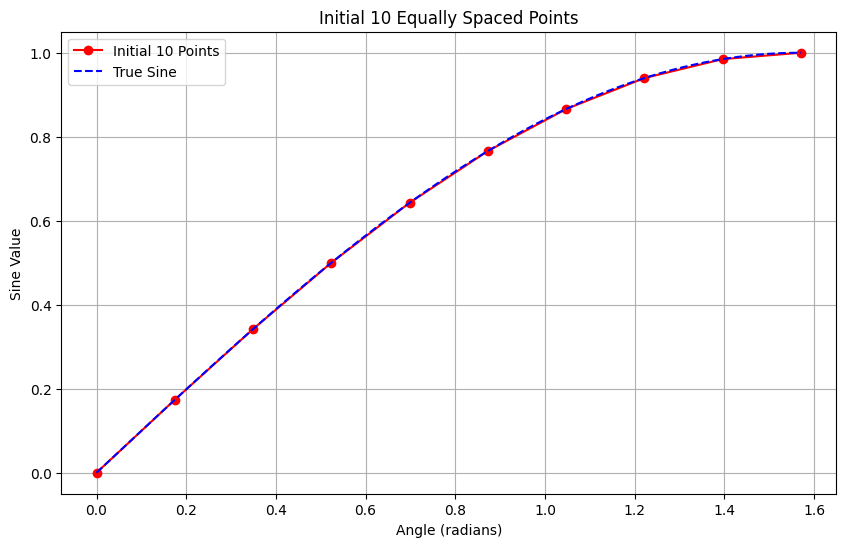

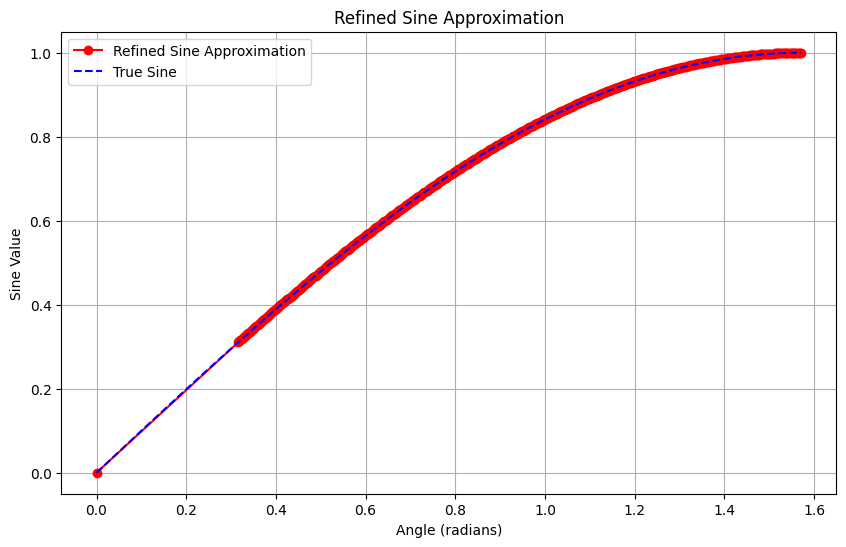

Initial number of elements: 10
Initial Maximum Interpolation Error: 0.0037908216
Final number of elements: 495
Final Maximum Interpolation Error: 0.0019540806


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_theta(num_elements):
    """Generate angles (theta) from 0 to pi/2."""
    return np.linspace(0, np.pi / 2, num_elements)

def calculate_sin(theta):
    """Calculate sine values for the given angles."""
    return np.sin(theta)

def finite_difference_second_derivative(y, h):
    """Calculate the second derivative using finite difference approximation."""
    d2ydx2 = np.zeros_like(y)
    d2ydx2[1:-1] = (y[2:] - 2 * y[1:-1] + y[:-2]) / (h**2)
    return d2ydx2

def calculate_error(theta, y):
    """Calculate the maximum interpolation error."""
    midpoints = (theta[1:] + theta[:-1]) / 2
    interpolated_values = y[:-1] + (y[1:] - y[:-1]) / (theta[1:] - theta[:-1]) * (midpoints - theta[:-1])
    actual_values = np.sin(midpoints)
    errors = np.abs(actual_values - interpolated_values)
    max_error = np.max(errors)
    return max_error

def refine_points(theta, y, tolerance):
    """Remove unnecessary points while ensuring error remains within tolerance."""
    refined_theta = np.copy(theta)
    refined_y = np.copy(y)
    indices_to_remove = []

    for i in range(1, len(refined_theta) - 1):
        temp_theta = np.delete(refined_theta, i)
        temp_y = np.delete(refined_y, i)
        max_error = calculate_error(temp_theta, temp_y)
        if max_error <= tolerance:
            indices_to_remove.append(i)

    refined_theta = np.delete(refined_theta, indices_to_remove)
    refined_y = np.delete(refined_y, indices_to_remove)
    return refined_theta, refined_y

def optimize_elements(initial_theta, initial_y, tolerance):
    """Optimize the number of elements based on tolerance."""
    theta = initial_theta
    y = initial_y
    num_elements = len(theta)
    max_iterations = 100
    iteration = 0

    while iteration < max_iterations:
        h = theta[1] - theta[0]
        second_derivative = finite_difference_second_derivative(y, h)
        max_error = calculate_error(theta, y)

        print(f"Iteration {iteration}: num_elements = {num_elements}, max_error = {max_error:.10f}")

        if max_error > tolerance:
            num_elements += max(1, int(num_elements * 0.5))
        elif max_error < tolerance * 0.5:
            num_elements -= max(1, int(num_elements * 0.25))
        else:
            break

        theta = generate_theta(num_elements)
        y = calculate_sin(theta)
        iteration += 1

    if iteration == max_iterations:
        print("Max iterations reached. The solution may not have converged.")

    return theta, y

# Main execution
tolerance = 1e-6

# Initial 10 equally spaced points
initial_theta = generate_theta(10)
initial_y = calculate_sin(initial_theta)

# Optimize and refine
optimized_theta, optimized_y = optimize_elements(initial_theta, initial_y, tolerance)
refined_theta, refined_y = refine_points(optimized_theta, optimized_y, tolerance)

# Plot initial points
plt.figure(figsize=(10, 6))
plt.plot(initial_theta, initial_y, 'ro-', label='Initial 10 Points')
plt.plot(np.linspace(0, np.pi / 2, 1000), np.sin(np.linspace(0, np.pi / 2, 1000)), 'b--', label='True Sine')
plt.title('Initial 10 Equally Spaced Points')
plt.xlabel('Angle (radians)')
plt.ylabel('Sine Value')
plt.legend()
plt.grid()
plt.show()

# Plot refined points
plt.figure(figsize=(10, 6))
plt.plot(refined_theta, refined_y, 'ro-', label='Refined Sine Approximation')
plt.plot(np.linspace(0, np.pi / 2, 1000), np.sin(np.linspace(0, np.pi / 2, 1000)), 'b--', label='True Sine')
plt.title('Refined Sine Approximation')
plt.xlabel('Angle (radians)')
plt.ylabel('Sine Value')
plt.legend()
plt.grid()
plt.show()

# Output results
initial_max_error = calculate_error(initial_theta, initial_y)
final_max_error = calculate_error(refined_theta, refined_y)
print(f"Initial number of elements: {len(initial_theta)}")
print(f"Initial Maximum Interpolation Error: {initial_max_error:.10f}")
print(f"Final number of elements: {len(refined_theta)}")
print(f"Final Maximum Interpolation Error: {final_max_error:.10f}")